# Partie sur la prediction des données

## Prédiction des scores des elections du second tour 2022 pour commune

### Bibliotheque

In [1]:
import pandas as pd
import numpy as np
import random
import os
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

### Préparation des données

In [2]:
# Sélection des features
df_concat = pd.read_excel('Commune.xlsx')

features = df_concat.drop(['Abstentions','Macron', 'Lepen', 'COM'], axis=1)

ScoreMacron =  df_concat['Macron'].values.reshape(-1, 1)

ScoreLepen =  df_concat['Lepen'].values.reshape(-1, 1)

ScoreAbstentions =  df_concat['Abstentions'].values.reshape(-1, 1)


# Normalisation des données
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(features)

scalerMacron = StandardScaler()
ScoreMacron = scalerMacron.fit_transform(ScoreMacron)

scalerLepen = StandardScaler()
ScoreLepen = scalerLepen.fit_transform(ScoreLepen)

scalerAbstentions = StandardScaler()
ScoreAbstentions = scalerAbstentions.fit_transform(ScoreAbstentions)


###  Selection des Colonnes intéressante

In [3]:
def Selection_Colonne_Pvalue(label):
    # Création de l'analyse pour la p_value
    p_values = {}
    for i, column in enumerate(features.columns):
        p_value = pearsonr(X_scaled[:, i], label.flatten())[1]
        p_values[i] = p_value

    # Sélectionnez les colonnes avec des p-values inférieures au seuil de significativité
    significant_indices = [column for column, p_value in p_values.items() if p_value < 0.05]
    #print("Affichage des colonnes selectionné : ",features.iloc[:, significant_indices].columns)
    return X_scaled[:, significant_indices]

X_Macron = Selection_Colonne_Pvalue(ScoreMacron)
X_Lepen = Selection_Colonne_Pvalue(ScoreLepen)
X_Abstentions = Selection_Colonne_Pvalue(ScoreAbstentions)

#division des données
split_index1 = int(df_concat.shape[0] * 0.8)
split_index2 = int(df_concat.shape[0] * 0.9)

X_train_Marcon, X_val_Marcon, X_test_Marcon = X_Macron[:split_index1, :], X_Macron[split_index1:split_index2, :], X_Macron[split_index2:, :]
y_train_Marcon, y_val_Marcon, y_test_Marcon = ScoreMacron[:split_index1], ScoreMacron[split_index1:split_index2], ScoreMacron[split_index2:]

X_train_Lepen, X_val_Lepen, X_test_Lepen = X_Lepen[:split_index1, :], X_Lepen[split_index1:split_index2, :], X_Lepen[split_index2:, :]
y_train_Lepen, y_val_Lepen, y_test_Lepen = ScoreLepen[:split_index1], ScoreLepen[split_index1:split_index2], ScoreLepen[split_index2:]

X_train_Abstentions, X_val_Abstentions, X_test_Abstentions = X_Abstentions[:split_index1, :], X_Abstentions[split_index1:split_index2, :], X_Abstentions[split_index2:, :]
y_train_Abstentions, y_val_Abstentions, y_test_Abstentions = ScoreAbstentions[:split_index1], ScoreAbstentions[split_index1:split_index2], ScoreAbstentions[split_index2:]


### Application de Regression

<h1> Liear Regression </h1>

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

def linear_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = linear_reg.score(X, y)
    

    # Affiche le résumé de la régression linéaire
    if print_values:
        # Affiche les p-values
        p_values = np.append(linear_reg.intercept_, linear_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
            
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = linear_regression_r_value(X_train_Marcon, y_train_Marcon, print_values=False)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = linear_regression_r_value(X_train_Lepen, y_train_Lepen, print_values=False)
print("R-value pour Le Pen:", r_value_Lepen)

# Pour les Abstentions
print("\nPour les Abstentions:")
r_value_Abstentions = linear_regression_r_value(X_train_Abstentions, y_train_Abstentions, print_values=False)
print("R-value pour les Abstentions:", r_value_Abstentions)


Pour Macron:
R-value pour Macron: 0.8991453092743774

Pour Le Pen:
R-value pour Le Pen: 0.8970865662306098

Pour les Abstentions:
R-value pour les Abstentions: 0.7771037438328549


<h1> Ridge </h1>

In [5]:
from sklearn.linear_model import Ridge
import numpy as np

def ridge_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire Ridge
    ridge_reg = Ridge()
    ridge_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = ridge_reg.score(X, y)
    
    if print_values:
        # Affiche les p-values
        p_values = np.append(ridge_reg.intercept_, ridge_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
    
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = ridge_regression_r_value(X_train_Marcon, y_train_Marcon, print_values=False)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = ridge_regression_r_value(X_train_Lepen, y_train_Lepen, print_values=False)
print("R-value pour Le Pen:", r_value_Lepen)

# Pour les Abstentions
print("\nPour les Abstentions:")
r_value_Abstentions = ridge_regression_r_value(X_train_Abstentions, y_train_Abstentions, print_values=False)
print("R-value pour les Abstentions:", r_value_Abstentions)


Pour Macron:
R-value pour Macron: 0.8991453082173804

Pour Le Pen:
R-value pour Le Pen: 0.8970865651761667

Pour les Abstentions:
R-value pour les Abstentions: 0.7771037420855031


<h1> SGD </h1>

In [6]:
from sklearn.linear_model import SGDRegressor
import numpy as np

def sgd_regression_r_value(X, y, print_values=False):
    # Crée et ajuste le modèle de régression linéaire avec la descente de gradient stochastique
    sgd_reg = SGDRegressor()
    sgd_reg.fit(X, y)
    
    # Récupère le coefficient de corrélation (r-value)
    r_value = sgd_reg.score(X, y)
    
    if print_values:
        # Affiche les p-values
        p_values = np.append(sgd_reg.intercept_, sgd_reg.coef_)
        print("P-values:")
        for i, p_value in enumerate(p_values):
            print(f"Feature {i}: {p_value}")
    
    return r_value

# Pour Macron
print("Pour Macron:")
r_value_Macron = sgd_regression_r_value(X_train_Marcon, y_train_Marcon)
print("R-value pour Macron:", r_value_Macron)

# Pour Le Pen
print("\nPour Le Pen:")
r_value_Lepen = sgd_regression_r_value(X_train_Lepen, y_train_Lepen)
print("R-value pour Le Pen:", r_value_Lepen)

# Pour les Abstentions
print("\nPour les Abstentions:")
r_value_Abstentions = sgd_regression_r_value(X_train_Abstentions, y_train_Abstentions)
print("R-value pour les Abstentions:", r_value_Abstentions)


Pour Macron:
R-value pour Macron: 0.8977166443734662

Pour Le Pen:
R-value pour Le Pen: 0.8958036789654189

Pour les Abstentions:
R-value pour les Abstentions: 0.7744123155732483


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Foret Aleatoire

In [7]:
from sklearn.ensemble import RandomForestRegressor

#Macron
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

predictions_rf = rf_regressor.predict(X_test_Marcon)

correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))


Corrélation entre les valeurs réelles et prédites : 0.9544138062366454
P-value associée : 0.0
R-value : 0.9107702829446106


In [8]:
#Lepen
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

predictions_rf = rf_regressor.predict(X_test_Lepen)

correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9539925903140452
P-value associée : 0.0
R-value : 0.9099783283749514


In [9]:
#Abstention
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

predictions_rf = rf_regressor.predict(X_test_Abstentions)

correlation, p_value = pearsonr(y_test_Abstentions.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9070346337325595
P-value associée : 0.0
R-value : 0.816958673309469


### SVM

Macron

In [10]:
from sklearn.svm import SVR

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.9547836655345897
P-value associée : 0.0
R-value : 0.9114585183583332


In [11]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.32741952161662324
P-value associée : 2.928919033071313e-79
R-value : -6.876217956688898


Lepen

In [12]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.9547486745998033
P-value associée : 0.0
R-value : 0.9113242770395424


In [13]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.34956357169567215
P-value associée : 8.209659367437134e-91
R-value : -5.833930711619141


Abstentions

In [14]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

y_pred_linear = svm_regressor.predict(X_test_Abstentions)
correlation, p_value = pearsonr(y_test_Abstentions.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.905304388119601
P-value associée : 0.0
R-value : 0.817337078730024


In [15]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

y_pred_linear = svm_regressor.predict(X_test_Abstentions)
correlation, p_value = pearsonr(y_test_Abstentions.ravel(), y_pred_linear)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), y_pred_linear))

Corrélation entre les valeurs réelles et prédites : 0.2288085430410613
P-value associée : 1.5735153986419386e-38
R-value : -9.041528857066169


### Reseau de neuronne

In [16]:
#conversion pandas -> numpy

X_trainNN_Marcon = np.array(X_train_Marcon,dtype=float)
X_trainNN_Lepen = np.array(X_train_Lepen,dtype=float)
X_trainNN_Abstentions = np.array(X_train_Abstentions,dtype=float)

y_trainNN_Lepen = np.array(y_train_Lepen,dtype=float)
y_trainNN_Marcon = np.array(y_train_Marcon,dtype=float)
y_trainNN_Abstentions = np.array(y_train_Abstentions,dtype=float)

X_valNN_Marcon = np.array(X_val_Marcon,dtype=float)
X_valNN_Lepen = np.array(X_val_Lepen,dtype=float)
X_valNN_Abstentions = np.array(X_val_Abstentions,dtype=float)
y_valNN_Lepen = np.array(y_val_Lepen,dtype=float)
y_valNN_Marcon = np.array(y_val_Marcon,dtype=float)
y_valNN_Abstentions = np.array(y_val_Abstentions,dtype=float)

X_testNN_Marcon = np.array(X_test_Marcon,dtype=float)
X_testNN_Lepen = np.array(X_test_Lepen,dtype=float)
X_testNN_Abstentions = np.array(X_test_Abstentions,dtype=float)

y_testNN_Lepen = np.array(y_test_Lepen,dtype=float)
y_testNN_Marcon = np.array(y_test_Marcon,dtype=float)
y_testNN_Abstentions = np.array(y_test_Abstentions,dtype=float)

In [17]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np


CallBackSave = callbacks.ModelCheckpoint("best_model_Valeurs.keras", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=20)

"""class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 0.3:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbackStop = myCallback()"""

def createModel():
    #model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[features.shape[1]])])

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.Adam())
    return model

def affichagePrediction(prediction, reel):
    for i in range(len(prediction)):
        print("valeur prédite :", prediction[i], "valeur réelle :", reel[i], "écart :", np.abs(prediction[i] - reel[i]))

#### Entrainement pour Macron

In [18]:
model = createModel()
history = model.fit(X_trainNN_Marcon, y_trainNN_Marcon,
                    epochs=1000,validation_data=(X_valNN_Marcon, y_valNN_Marcon),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1852 - val_loss: 0.1001
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1040 - val_loss: 0.0916
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0972 - val_loss: 0.0904
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0897 - val_loss: 0.0910
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0947 - val_loss: 0.0969
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0879 - val_loss: 0.0898
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0828 - val_loss: 0.0949
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0857 - val_loss: 0.0965
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0844 - val_loss: 0.1020
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0809 - val_loss: 0.0960
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0783 - val_loss: 0.0968
Epoch 12/1000
784/784 ━━━━━━━━

In [19]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerMacron.inverse_transform(y_trainNN_Marcon[0].reshape(-1, 1)), "; valeur predite : ",scalerMacron.inverse_transform(best_model.predict(X_trainNN_Marcon[0:1]).reshape(-1, 1)))


y_pred_NN = best_model.predict(X_testNN_Marcon)

reel = scalerMacron.inverse_transform(y_testNN_Marcon)
prediction = scalerMacron.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pour Macron")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Marcon, y_testNN_Marcon)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Marcon),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)

print("R-value :", r2_score(np.squeeze(y_testNN_Marcon),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Sur les entrainement la valeur reel :  [[52.67]] ; valeur predite :  [[53.06148]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1202
Perte de test : 0.10754148662090302
Corrélation entre les valeurs réelles et prédites : 0.9576531016599328
P-value associée : 0.0
R-value : 0.9169225299987149


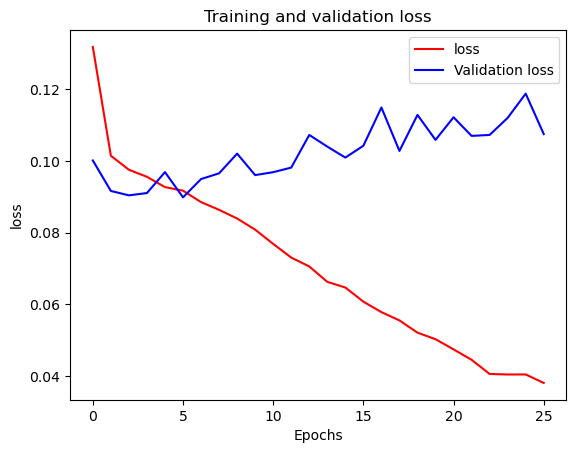

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour Lepen

In [21]:
model = createModel()
history = model.fit(X_trainNN_Lepen, y_trainNN_Lepen,
                    epochs=1000,validation_data=(X_valNN_Lepen, y_valNN_Lepen),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1990 - val_loss: 0.1049
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1070 - val_loss: 0.0949
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1030 - val_loss: 0.0964
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0976 - val_loss: 0.1055
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0911 - val_loss: 0.0969
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0947 - val_loss: 0.1005
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0871 - val_loss: 0.0991
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0818 - val_loss: 0.1064
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0821 - val_loss: 0.0966
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0738 - val_loss: 0.1074
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0772 - val_loss: 0.1057
Epoch 12/1000
784/784 ━━━━━━━━

In [22]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerLepen.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerLepen.inverse_transform(best_model.predict(X_trainNN_Lepen[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN_Lepen)

reel = scalerLepen.inverse_transform(y_testNN_Lepen)
prediction = scalerLepen.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pour Lepen")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Lepen, y_testNN_Lepen)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Lepen),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(np.squeeze(y_testNN_Lepen),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Sur les entrainement la valeur reel :  [[47.33]] ; valeur predite :  [[53.389904]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.1349
Perte de test : 0.10896150767803192
Corrélation entre les valeurs réelles et prédites : -0.9576925181927105
P-value associée : 0.0
R-value : -2.7346468463560014


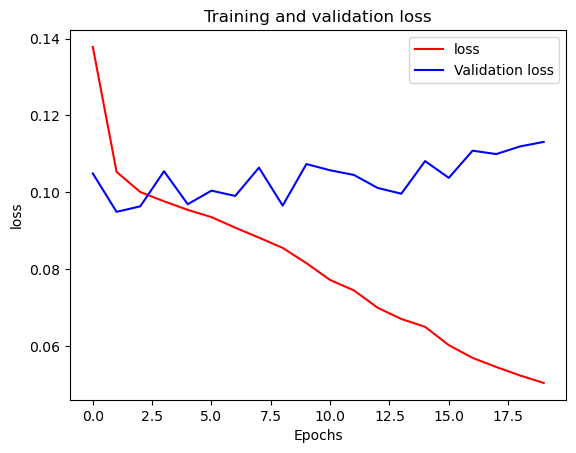

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour l'abstention

In [24]:
model = createModel()
history = model.fit(X_trainNN_Abstentions, y_trainNN_Abstentions,
                    epochs=1000,validation_data=(X_valNN_Abstentions, y_valNN_Abstentions),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3658 - val_loss: 0.2855
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2305 - val_loss: 0.2294
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2161 - val_loss: 0.2351
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2142 - val_loss: 0.2333
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2055 - val_loss: 0.2239
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2021 - val_loss: 0.2368
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1986 - val_loss: 0.2325
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1925 - val_loss: 0.2414
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1863 - val_loss: 0.2410
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1742 - val_loss: 0.2398
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1668 - val_loss: 0.2526
Epoch 12/1000
784/784 ━━━━━━━━

In [25]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerAbstentions.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerAbstentions.inverse_transform(best_model.predict(X_trainNN_Abstentions[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN_Abstentions)

reel = scalerAbstentions.inverse_transform(y_testNN_Abstentions)
prediction = scalerAbstentions.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pourl' Abstentions")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Abstentions, y_testNN_Abstentions)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Abstentions),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)

print("R-value :", r2_score(np.squeeze(y_testNN_Abstentions),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sur les entrainement la valeur reel :  [[19.93009084]] ; valeur predite :  [[21.703524]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.2847
Perte de test : 0.2573554813861847
Corrélation entre les valeurs réelles et prédites : -0.41490572080006544
P-value associée : 9.292857709259566e-131
R-value : -0.9617386183022976


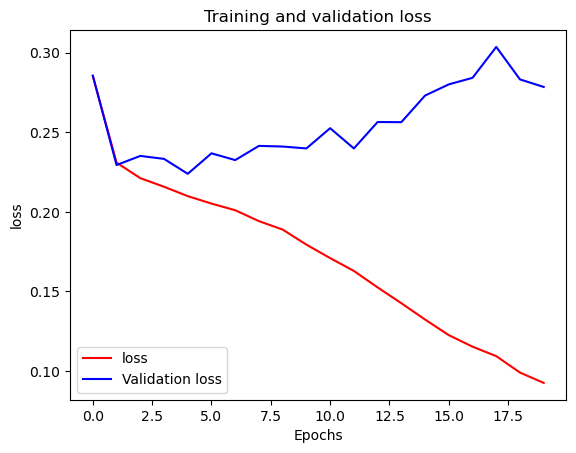

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()